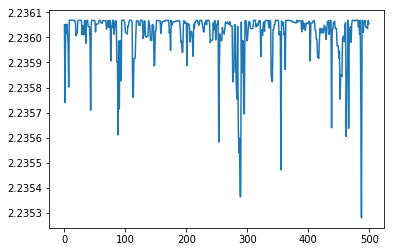

In [4]:
#目标求解2*sin(x)+cos(x)最大值

import random
import math
import matplotlib.pyplot as plt

class GA(object):
    
    def __init__(self, population_size, chromosome_length, max_value, pc, pm):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.max_value = max_value
        self.pc = pc
        self.pm = pm
        
        
    #初始化生成chromosome_length大小的population_size个个体的二进制基因型种群
    def species_origin(self):
        #二维列表，包含个体和染色体
        population = [[]]
    
        for i in range(self.population_size):
            #染色体暂存器
            temporary = []
        
            for j in range(self.chromosome_length):
                #随机产生一个染色体,由二进制数组成
                temporary.append(random.randint(0, 1))
        
            #将染色体添加到种群中
            population.append(temporary)
    
        #将种群返回，种群是个二维数组，个体和染色体两维
        return population[1:]
    
    #从二进制到十进制
    #input:种群,染色体长度
    def translation(self, population):
        temporary = []
    
        for i in range(len(population)):
            total = 0
            index = 0
            for j in range(self.chromosome_length - 1, -1, -1):
                #从第一个基因开始，每位对2求幂，再求和
                # 如：0101 转成十进制为：1 * 20 + 0 * 21 + 1 * 22 + 0 * 23 = 1 + 0 + 4 + 0 = 5
                total += population[i][j]*(math.pow(2, index))
                index += 1
            #一个染色体编码完成，由一个二进制数编码为一个十进制数
            temporary.append(total)
    
        # 返回种群中所有个体编码完成后的十进制数
        return temporary
    
    # 目标函数相当于环境 对染色体进行筛选，这里是2*sin(x)+cos(x)
    def function(self, population):
        temporary = []
        function_result = []
        # 暂存种群中的所有的染色体(十进制)
        temporary = self.translation(population)
    
        for i in range(len(temporary)):
            #一个基因代表一个决策变量，其算法是先转化成十进制，然后再除以2的基因个数次方减1(固定值)。
            x = temporary[i] * self.max_value / (math.pow(2, self.chromosome_length) - 1)
            #这里将2*sin(x)+cos(x)作为目标函数，也是适应度函数
            function_result.append(2 * math.sin(x) + math.cos(x))
    
        return function_result

    #只保留非负值的适应度/函数值(不小于0)
    def fitness(self, function_result):
        fitness_value = []
        min_fitness = mf = 0
    
        for i in range(len(function_result)):
            if (function_result[i] + mf > 0):
                temporary = mf + function_result[i]
            else :
                # 如果适应度小于0,则定为0
                temporary = 0.0
            #将适应度添加到列表中
            fitness_value.append(temporary)

        return fitness_value

    #计算适应度和
    def sum(self, fitness_value):
        total = 0
        for i in range(len(fitness_value)):
            total += fitness_value[i]
        return total

    #计算适应度斐波纳挈列表，这里是为了求出累积的适应度
    def cumsum(self, fitness_value):
        # range(start,stop,[step])
        for i in range(len(fitness_value) - 2, -1, -1):
        
            total = 0
            j = 0
            while(j <= i):
                total += fitness_value[j]
                j += 1
            #这里是为了将适应度划分成区间
            fitness_value[i] = total
            fitness_value[len(fitness_value) - 1] = 1
            
    #选择种群中个体适应度最大的个体
    def selection(self, population, fitness_value):
        new_fitness = []
        #将所有的适应度求和
        total_fitness = self.sum(fitness_value)
    
        #将所有个体的适应度概率化,类似于softmax
        for i in range(len(fitness_value)):
            new_fitness.append(fitness_value[i] / total_fitness)
     
        #将所有个体的适应度划分成区间
        self.cumsum(new_fitness)
    
        #存活的种群
        ms = []
    
        #根据随机数确定哪几个能存活
        for i in range(len(population)):
            # 产生种群个数的随机值
            ms.append(random.random())
    
        # 存活的种群排序
        #ms.sort()
    
        fitin = 0
        newin = 0
    
        new_pop = population.copy()
    
        #轮盘赌方式
        while newin < len(population):
            if (ms[newin] < new_fitness[fitin]):
                new_pop[newin] = population[fitin]
                newin += 1
            else:
                fitin += 1
        
        population = new_pop.copy()
        
    #交叉操作
    #pc是概率阈值，选择单点交叉还是多点交叉，生成新的交叉个体，这里没用
    def crossover(self, population):
        for i in range(len(population) - 1):
            if(random.random() < self.pc):
                #在种群个数内随机生成单点交叉点
                cpoint = random.randint(0, len(population[0]))
            
                temporary1 = []
                temporary2 = []
            
                #将tmporary1作为暂存器，暂时存放第i个染色体中的前0到cpoint个基因，
                #然后再把第i+1个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面
                temporary1.extend(population[i][0:cpoint])
                temporary1.extend(population[i+1][cpoint:len(population[i])])
        
                # 将tmporary2作为暂存器，暂时存放第i+1个染色体中的前0到cpoint个基因，
                # 然后再把第i个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面
                temporary2.extend(population[i+1][0:cpoint])
                temporary2.extend(population[i][cpoint:len(population[i])])
            
                # 第i个染色体和第i+1个染色体基因重组/交叉完成
                population[i] = temporary1
                population[i+1] = temporary2
                
    #变异操作
    # pm是概率阈值
    def mutation(self, population):
        # 求出种群中所有个体的个数
        px = len(population)
        # 染色体的个数
        py = len(population[0])
    
        for i in range(px):
            if (random.random() < self.pm):
                mpoint = random.randint(0, py - 1)
            
                #将mpoint个基因进行单点随机变异，变为0或者1
                if (population[i][mpoint] == 1):
                    population[i][mpoint] = 0
                else:
                    population[i][mpoint] = 1
                    
    # 将每一个染色体都转化成十进制 max_value
    def b2d(self, best_individual):
        total = 0
        index = 0
        for i in range(len(best_individual)-1, -1, -1):
            total = total + best_individual[i] * math.pow(2, index)
            index += 1
        
        total = total * self.max_value / (math.pow(2, self.chromosome_length) - 1)
        return total

    #寻找最好的适应度和个体
    def best(self, population, fitness_value):

        bestindividual = population[0]
        bestfitness = fitness_value[0]
    
        for i in range(1, len(population)):
            if (fitness_value[i] > bestfitness):
                bestfitness = fitness_value[i]
                bestindividual = population[i]
            
        return [bestindividual, bestfitness]
    
    def plot(self, results):
        X = []
        Y = []
 
        for i in range(500):
            X.append(i)
            Y.append(results[i][0])
 
        plt.plot(X, Y)
        plt.show()
        
    def main(self):
 
        results = [[]]
        fitness_value = []
        fitmean = []
 
        population = self.species_origin()
 
        for i in range(500):
            function_value = self.function(population)
            # print('fit funtion_value:',function_value)
            fitness_value = self.fitness(function_value)
            # print('fitness_value:',fitness_value)
 
            # 将最好的个体和最好的适应度保存，并将最好的个体转成十进制,适应度函数
            best_individual, best_fitness = self.best(population, fitness_value)
            results.append([best_fitness, self.b2d(best_individual)])
        
            self.selection(population, fitness_value)
            self.crossover(population)
            self.mutation(population)
            
        results = results[1:]
        #results.sort()
        self.plot(results)

if __name__ == '__main__':
    population_size = 400
    max_value = 10
    chromosome_length = 20
    pc = 0.6
    pm = 0.01
    ga = GA(population_size, chromosome_length, max_value, pc, pm)
    ga.main()
